<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/ejercicios_histograma_dtased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv("/content/archive.zip")

In [ ]:
list(df.columns)


['Brand',
 'Model',
 'Year',
 'Engine_Size',
 'Fuel_Type',
 'Transmission',
 'Mileage',
 'Doors',
 'Owner_Count',
 'Price']

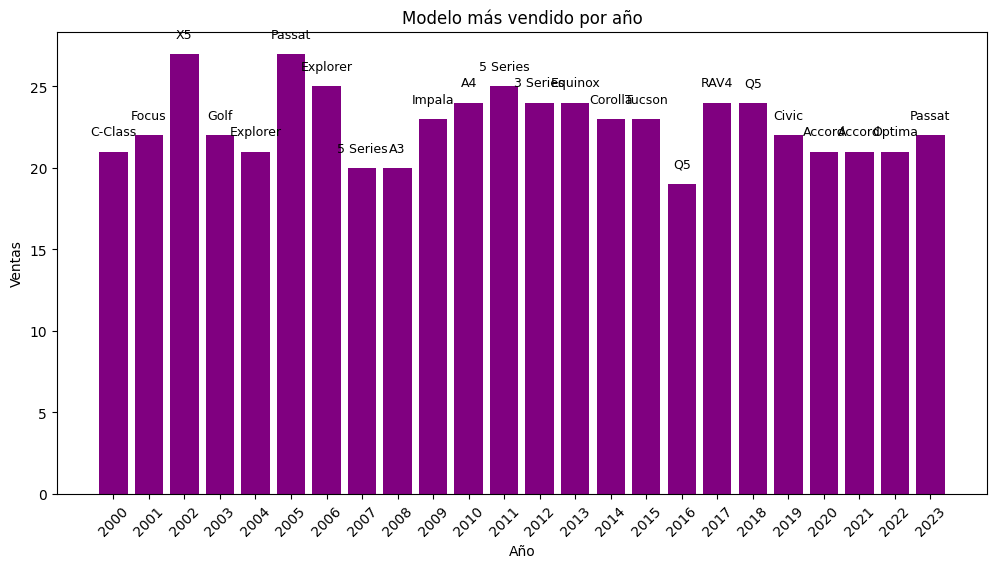

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



sales_by_year = df.groupby(["Year", "Model"]).size().reset_index(name="Sales")

most_sold_per_year = sales_by_year.loc[sales_by_year.groupby("Year")['Sales'].idxmax()]

plt.figure(figsize=(12,6))
plt.bar(most_sold_per_year['Year'].astype(str), most_sold_per_year['Sales'], color='purple')
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.title("Modelo más vendido por año")
plt.xticks(rotation=45)

for i, txt in enumerate(most_sold_per_year['Model']):
    plt.text(i, most_sold_per_year['Sales'].iloc[i] + 1, txt, ha='center', fontsize=9)

plt.show()

In [ ]:
from scipy.stats import trim_mean
import numpy as np

def media_truncada(datos, porcentaje):
    """
    Calcula la media truncada de un conjunto de datos.

    :param datos: Lista o array de valores numéricos.
    :param porcentaje: Porcentaje de datos a recortar en cada extremo (ej. 0.1 para 10%).
    :return: Media truncada.
    """
    return trim_mean(datos, porcentaje)

datos = np.array([10, 20, 30, 40, 50, 1000])
porcentaje_recorte = 0.1

media_t = media_truncada(datos, porcentaje_recorte)
print(f"Media truncada: {media_t}")


Media truncada: 191.66666666666666


Varianza: 9688258.90342295
Desviación Estándar: 3112.596810289272
Desviación Media Absoluta: 2536.97825696
Desviación Absoluta de la Media (MAD): 3293.600828410195
Rango: 16301
Mediana (Estadística Ordinal): 8858.5
Percentil 25: 6646.0
Percentil 50: 8858.5
Percentil 75: 11086.5
Rango Intercuartil (IQR): 4440.5


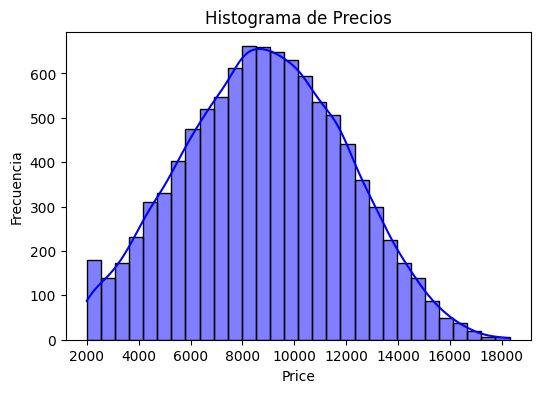

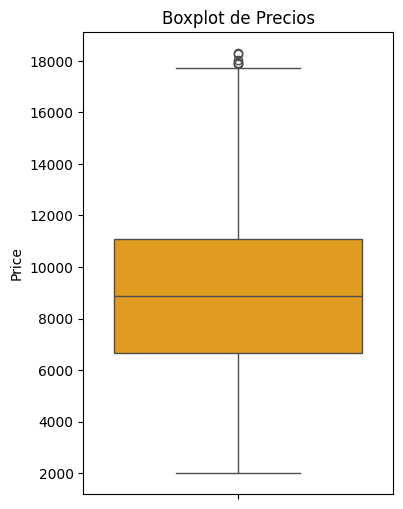

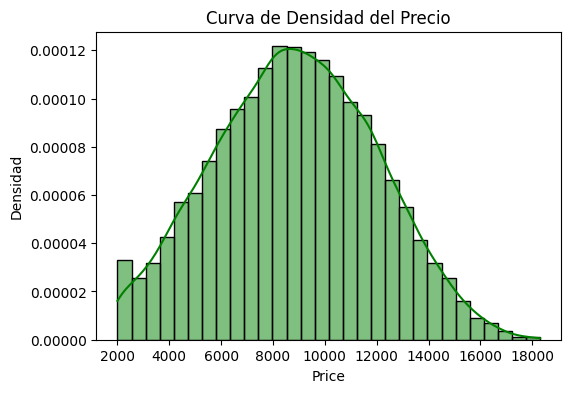

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust

df = pd.read_csv("/archive.zip")

column = "Price"
data = df[column]

varianza = np.var(data, ddof=1)
desviacion_estandar = np.std(data, ddof=1)
desviacion_media_absoluta = np.mean(np.abs(data - np.mean(data)))
desviacion_absoluta_media = robust.scale.mad(data)
rango = np.max(data) - np.min(data)
percentiles = np.percentile(data, [25, 50, 75])
rango_intercuartil = percentiles[2] - percentiles[0]

estadisticas = {
    "Varianza": varianza,
    "Desviación Estándar": desviacion_estandar,
    "Desviación Media Absoluta": desviacion_media_absoluta,
    "Desviación Absoluta de la Media (MAD)": desviacion_absoluta_media,
    "Rango": rango,
    "Mediana (Estadística Ordinal)": percentiles[1],
    "Percentil 25": percentiles[0],
    "Percentil 50": percentiles[1],
    "Percentil 75": percentiles[2],
    "Rango Intercuartil (IQR)": rango_intercuartil
}
for key, value in estadisticas.items():
    print(f"{key}: {value}")

plt.figure(figsize=(6,4))
sns.histplot(data, bins=30, kde=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.title("Histograma de Precios")
plt.show()

plt.figure(figsize=(4,6))
sns.boxplot(y=data, color='orange')
plt.ylabel("Price")
plt.title("Boxplot de Precios")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data, bins=30, kde=True, stat="density", color='green')
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.title("Curva de Densidad del Precio")
plt.show()


#a) ¿Qué significa que la desviación estándar es casi dos veces mayor que la MAD?

Si la desviación estándar es mucho mayor que la MAD, indica que hay valores extremos (autos con precios anormalmente altos o bajos), lo que provoca una mayor dispersión en la distribución.

#b) ¿Cómo puedo mejorar esta situación?
Para reducir la influencia de los valores extremos en la dispersión de los datos, puedes:

Eliminar o ajustar valores atípicos, detectándolos con métodos como el IQR o z-score.
Aplicar transformaciones como logaritmos o escalas robustas para reducir la influencia de valores muy grandes.
Usar métricas robustas como la MAD o el IQR en lugar de la desviación estándar.
#c) Explique el resultado obtenido al calcular el IQR
El IQR (rango intercuartil) mide la diferencia entre los percentiles 75 y 25, mostrando la dispersión central de los datos.

Si el IQR es grande, significa que los precios de los autos están muy dispersos en su rango intermedio. Un IQR pequeño indica que la mayoría de los autos tienen precios similares, con menos variabilidad en la mediana.

Exploración en Distribución de Datos
#a) ¿Qué información nos suministran los percentiles de la tasa de homicidios por estado?
En este caso, aplicándolo a los precios de los autos, los percentiles nos indican puntos clave de la distribución:

Percentil 25: Precio por debajo del cual está el 25% de los autos más baratos.
Mediana (Percentil 50): Precio que divide la mitad de los autos.
Percentil 75: Precio por debajo del cual está el 75% de los autos.
Estos valores ayudan a entender cómo se distribuyen los precios y a identificar si hay sesgo hacia autos más baratos o caros.

#b) ¿Qué información suministra el diagrama de caja respecto a la tasa de homicidios por estado?
Aplicado al precio de los autos, el boxplot nos da información como:

Rango intercuartil (caja): Representa el 50% central de los datos.
Líneas (bigotes): Indican el rango sin contar valores atípicos.
Puntos fuera de los bigotes: Representan autos con precios extremos.
Si la mediana está desplazada, indica que la distribución no es simétrica. Si hay muchos valores atípicos, sugiere que algunos autos tienen precios muy diferentes del resto.

#c) ¿Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos?
En este contexto, podríamos agrupar los autos en rangos de precios según los percentiles y crear una tabla que los clasifique en:

Autos económicos (≤ Percentil 25)
Autos de precio medio (Percentil 25 - 75)
Autos caros (> Percentil 75)
Para agregar estos datos, puedes generar una nueva columna en el DataFrame categorizando los autos en estos intervalos.

Explicación del Diagrama de Dispersión
Un diagrama de dispersión entre precio vs. kilometraje ayudaría a ver si hay una relación entre el desgaste del auto y su precio.

Si hay una tendencia descendente, indica que a mayor kilometraje, menor precio.
Si no hay patrón claro, significa que el precio depende más de otros factores como marca, año o tipo de combustible.